## Term Sheet Exploratory Data Analysis

> import libraries

In [305]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# bespoke module 
from data import outlier_vars, outlier_treatment

> import datasets

In [2]:
path= '../../datasets/main_data/bank-additional-full.csv'
full_bank = pd.read_csv(path, sep=';', delimiter=None, )

In [3]:
full_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Data Wrangling

In [4]:
full_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

> Check for nan values

In [5]:
full_bank.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

No null values

> inspect the numerical values

In [6]:
num_cols = full_bank.select_dtypes(include='number')

In [7]:
num_cols

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


> check for statistical properties

In [8]:
num_cols.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


> check for outliers

In [9]:
outliers = outlier_vars(num_cols)
outliers

,age,duration,campaign,pdays,previous,cons.conf.idx
0,56,261,1,999,0,-36.4
1,57,149,1,999,0,-36.4
2,37,226,1,999,0,-36.4
3,40,151,1,999,0,-36.4
4,56,307,1,999,0,-36.4
...,...,...,...,...,...,...
41183,73,334,1,999,0,-50.8
41184,46,383,1,999,0,-50.8
41185,56,189,2,999,0,-50.8
41186,44,442,1,999,0,-50.8


> plot the outlier columns

{'age': True, 'duration': True, 'campaign': True, 'pdays': True, 'previous': True, 'emp.var.rate': False, 'cons.price.idx': False, 'cons.conf.idx': True, 'euribor3m': False, 'nr.employed': False},

 Visualization of outlier columns


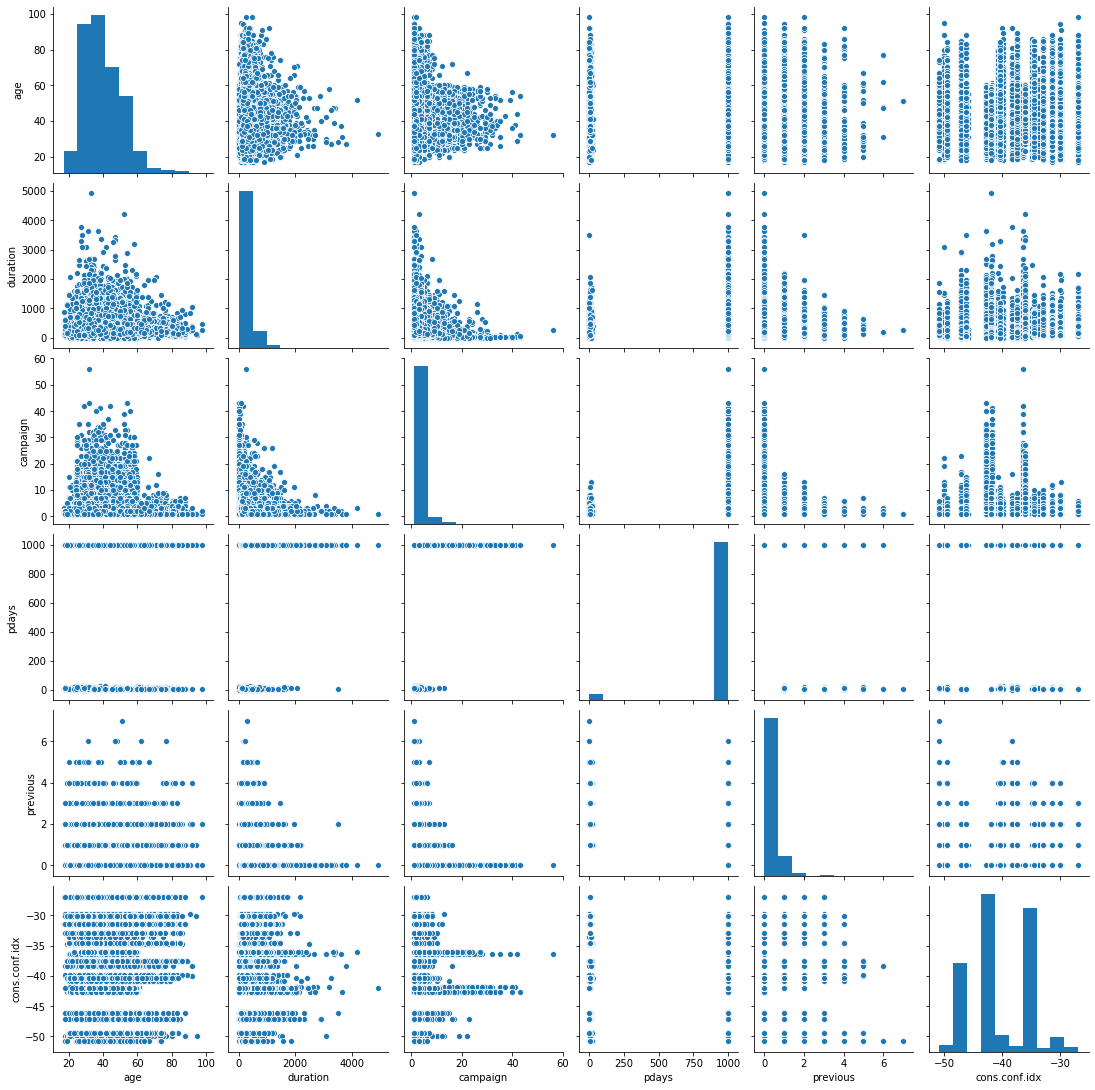

In [10]:
outlier_vars(data=num_cols, show_plot=True)

> About 5 columns in the numerical columns report True for outliers  

> Also the pairplot (scatter and histogram confirms that there are data points that devaite from the mass of data points in some columns)

Cleaning

Replace outlier values using median Replacement

In [28]:
# use default median replacement method
no_outlier_data=outlier_treatment(data=num_cols, col_list=num_cols.columns.tolist())

> confirm no more outlier values

In [29]:
outlier_vars(no_outlier_data)

,age,duration,campaign,pdays,previous,cons.conf.idx
0,56,56.0,1,999,0,-36.4
1,57,57.0,1,999,0,-36.4
2,37,37.0,1,999,0,-36.4
3,40,40.0,1,999,0,-36.4
4,56,56.0,1,999,0,-36.4
...,...,...,...,...,...,...
41183,73,73.0,1,999,0,-50.8
41184,46,46.0,1,999,0,-50.8
41185,56,56.0,2,999,0,-50.8
41186,44,44.0,1,999,0,-50.8


> we were able to handle outlers in all columns aside the duration.

> Let's try to understand the duration clumn better

In [13]:
num_cols.duration.value_counts() 

85      170
90      170
136     168
73      167
124     164
       ... 
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

In [14]:
num_cols.duration.median()

180.0

In [15]:
num_cols.duration.quantile(0.25)

102.0

In [16]:
num_cols.duration.quantile(0.75)

319.0

In [17]:
iqr = num_cols.duration.quantile(0.75) - num_cols.duration.quantile(0.25)
iqr

217.0

In [18]:
low_outliers = num_cols.duration.quantile(0.25) - 1.5 *iqr
low_outliers

-223.5

> The outlier values are far off the low interquartile rane to detect them, 
> hence we would try another outlier treatment type for this column

> I would be using log_transform because it normalises all value between 0 & 1

In [19]:
num_cols.duration.mean()

258.2850101971448

In [20]:
num_cols.duration = outlier_treatment(num_cols, col_list=['duration'], type="log_transform")

/home/patrick/Documents/Semicolon/Projects/standAlones/data_science_projects_standalone/Classification_Problems/term_deposit_prediction/analysis_model/analysis/interactive/data.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].map(lambda i: np.log(i) if i > 0 else 0)
/home/patrick/.local/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


> The project requires that much emphasis should not be placed on the duration column

> Also it would not be used for prediciton as such it would be dropped during modelling

clean main data

In [31]:
clean_bank = full_bank.copy()

In [32]:
clean_bank = outlier_treatment(data=clean_bank, col_list=num_cols.columns.to_list())

In [33]:
clean_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Univariate Analysis

In [218]:
import os
def plot_univariate (data, x=None, y=None, color='r',save=False,
                title='New Chart', chart_type='hist', xlabel='', ylabel='',
                    save_to=os.getcwd(), log_normalise=False):
    
    
    """
    Make a univariate plot of any of these selcted types:
    
    1. bar - barchart
    
    2. hist - Histogram
    
    3. pie - Piechart
    
    4. count - Countplot
    
    
    """
    
    plt.subplots(figsize=(10,7))
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    
    if chart_type == 'hist':
        if log_normalise:
            data = np.log(data)
        plot = sns.distplot(a=data, color=color)
        if save:
            plt.savefig(fname=save_to+f'/{title}.png', format='png')
        
    return plot

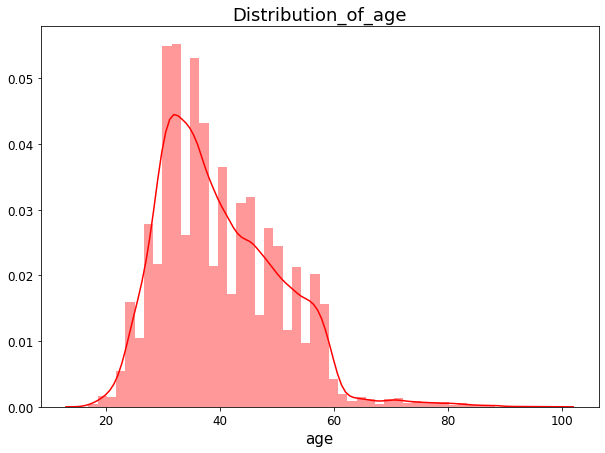

In [212]:
plot_univariate(clean_bank.age, save=True, title='Distribution_of_age');

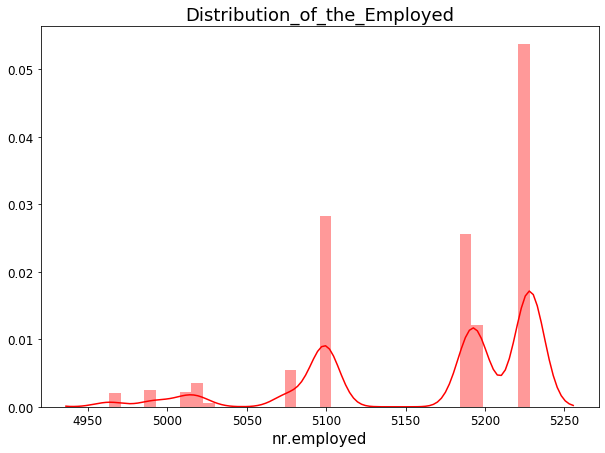

In [213]:
plot_univariate(clean_bank['nr.employed'], save=True, title='Distribution_of_the_Employed');

> From here we see that the data is skewed to the left
> Let's log normalise the data for better view

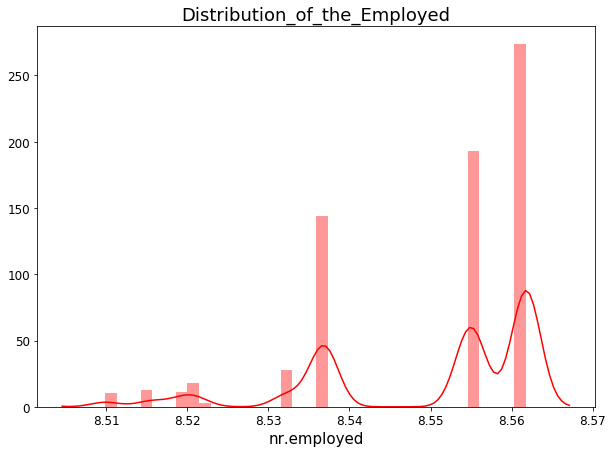

In [210]:
plot_univariate(clean_bank['nr.employed'], save=True, title='Distribution_of_the_Employed',
               log_normalise=True);

#### Bivariate Analysis

In [339]:
def plot_bivariate(data, x=None, y=None, hue=None, 
                  color='r',save=False,
                title='New Chart', chart_type='hist',
                   xlabel='', ylabel='',
                    save_to=os.getcwd(), img_name = " ", 
                   palette={'use':False, "size":1}, log_normalise=False,
                  kind_joint_plot = 'scatter', kind_pair_plot="scatter", figsize=(10,7)):
    
    """
    Make a bivariate plot of any of the selcted types:
    
    1. bar - barchart
    
    2. scatter  - scatter plot
    
    3. cat  - catplot
    
    4. count - countplot
    
    5 joint - jointplot 
    
    6  pair - pairplot
    
    7  corr - corr_plot
    
    When calling joint_plot:
        
        kind_joint_plot is default to `scatter`
        other types include "reg", "reside", "kde", "hex"
        
    When calling pair_plot:
        
        kind_pair_plot is default to `scatter`
        other types include 'reg'
    """
    def plt_tweaks():
        plt.subplots(figsize= figsize)
        plt.title(title, fontsize=18)
        plt.xlabel(xlabel, fontsize=15)
        plt.ylabel(ylabel, fontsize=15)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
    
    
    # define helper functions
    
    def use_palette():
        palettes = []
#        palette_to_use=[]
        if palette['use'] == True:
            palette_to_use = [palettes[i] for i in range(palette['size'])]
            
            return palette_to_use

    def log_norm():
        if log_normalise and y != None:
            y = np.log(y)
        elif log_normalise and y == None:
            data = np.log(data)
            
    def save_image():
        if save:
            if img_name != " ":
                plt.savefig(fname=save_to+"/"+img_name+'.png', format='png')
            else:
                plt.savefig(fname=save_to+f'/{title}.png', format='png')
                
        
    # make plots
    
    if chart_type == "joint":
        log_norm()
        plot = sns.jointplot(x=x, y=y, data=data,
                            height=6, ratio=5, space=0.2, kind=kind_joint_plot)
        
        save_image()
        
    if chart_type == "pair":
       # try:
        log_norm()
        if palette['use'] == True:
            palette_to_use = use_palette()
            plot = sns.pairplot(data, palette=palette_to_use, 
                            kind= kind_pair_plot,height=3, aspect=1, hue=hue)
        else:
             plot = sns.pairplot(data, 
                            kind= kind_pair_plot,height=2.5, aspect=1, hue=hue, )
        save_image()
        
    if chart_type  == "corr":
        plt_tweaks()
        corr_data = data.corr()
        corr_plot = sns.heatmap(corr_data,annot=True, fmt='.2g', center=0) 

In [279]:
clean_bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,purchase__yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no,0


> Transform target variable from categorical to numerical for comparison with other columns

In [237]:
clean_bank=clean_bank.merge(pd.get_dummies(clean_bank.y, prefix='purchase_', drop_first=True),
            left_index=True, right_index=True)

In [242]:
clean_bank.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,purchase__yes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


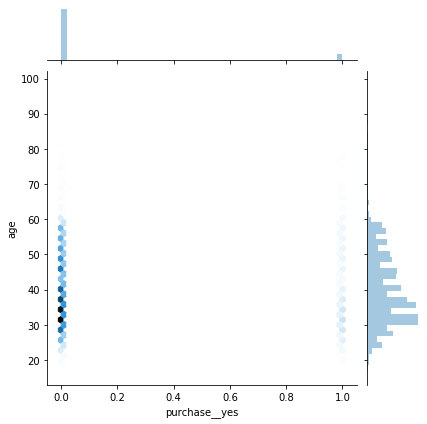

In [268]:
plot_bivariate(data=clean_bank, x='purchase__yes', y='age', 
               chart_type='joint', kind_joint_plot='hex', title="Age_vs_investment_purchase",
              save=True);

> We have more people who did not purhcase the investmentcompared to those that purchased 

> And majority of customers are within ages 30-60

In [350]:
pair_data = clean_bank.select_dtypes(exclude="object").merge(clean_bank.y,left_index=True, right_index=True)

pair_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,purchase__yes,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,yes
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,no
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,no
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,yes


In [351]:
pair_data = pair_data[['age', 'duration', 'campaign','purchase__yes']]

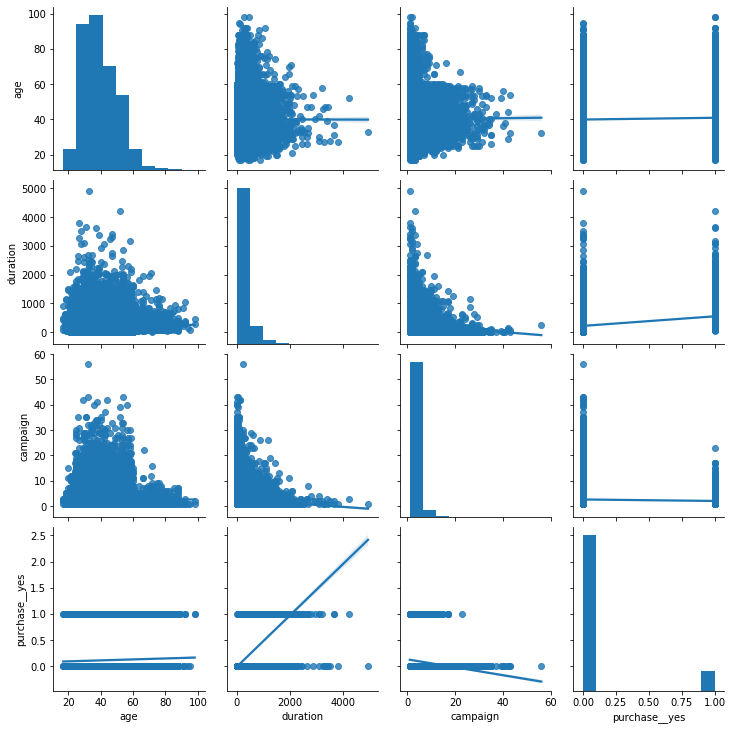

In [352]:
plot_bivariate(chart_type='pair', data=pair_data, save=True, kind_pair_plot='reg',
               title="Pairplot of features and target")

In [273]:
clean_bank.select_dtypes(exclude='object').dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
purchase__yes       uint8
dtype: object

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,purchase__yes
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


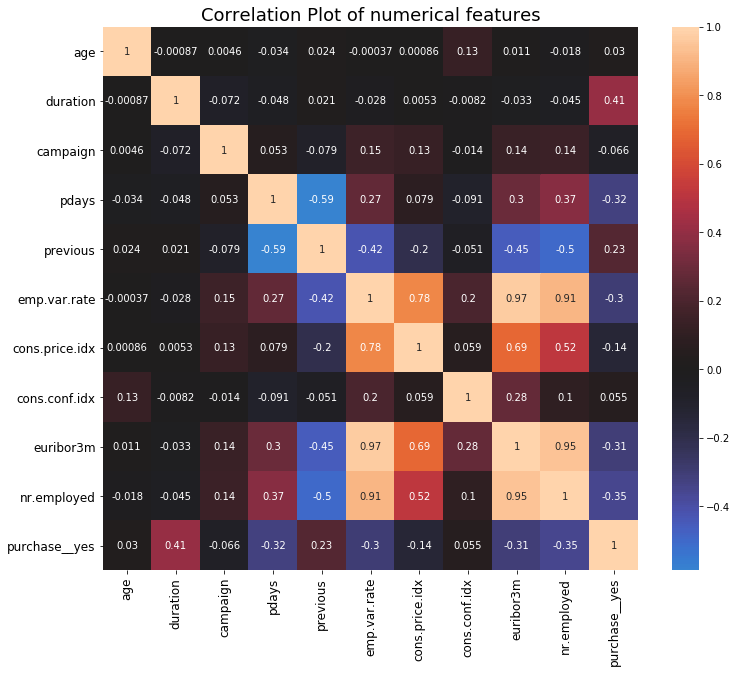

In [353]:
plot_bivariate(chart_type='corr', data=clean_bank, title="Correlation Plot of numerical features",
              figsize=(12,10))